<a href="https://colab.research.google.com/github/TBhanusai/AlMl-project/blob/main/Predictive_Analytics_For_Crop_Yeild_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
import pandas as pd

# Load dataset
file_path = '/content/kharif(capstone project_dataset).xlsx'
data = pd.read_excel(file_path)

# New section

In [ ]:
# Display the first 5 rows of the dataset
print(data.head())

       State         District   Year Range  Kharif Crop Area (Hectares)  \
0  Karnataka  Bangalore rural    1997-1998                          NaN   
1  Karnataka  Bangalore rural  1998 - 1999                      23543.0   
2  Karnataka  Bangalore rural  1999 - 2000                      18643.0   
3  Karnataka  Bangalore rural  2000 - 2001                      17892.0   
4  Karnataka  Bangalore rural  2001 - 2002                      12305.0   

   Kharif Production (Tonnes)  Kharif Yield (Tonne/Hectare)  \
0                         NaN                           NaN   
1                     24490.0                          1.04   
2                     14273.0                          0.77   
3                     16596.0                          0.93   
4                     14116.0                          1.15   

     Kharif Temperature (°C)  Kharif Rainfall (in mm)  \
0                       21.0                   649.15   
1                       23.5                   641.79   

In [ ]:
print(data.describe)

<bound method NDFrame.describe of           State         District   Year Range  Kharif Crop Area (Hectares)  \
0     Karnataka  Bangalore rural    1997-1998                          NaN   
1     Karnataka  Bangalore rural  1998 - 1999                      23543.0   
2     Karnataka  Bangalore rural  1999 - 2000                      18643.0   
3     Karnataka  Bangalore rural  2000 - 2001                      17892.0   
4     Karnataka  Bangalore rural  2001 - 2002                      12305.0   
...         ...              ...          ...                          ...   
1060        NaN              NaN          NaN                          NaN   
1061        NaN              NaN          NaN                          NaN   
1062        NaN              NaN          NaN                          NaN   
1063        NaN              NaN          NaN                          NaN   
1064  Karnataka              NaN  2022 - 2023                          NaN   

      Kharif Production (Tonn

In [ ]:
print(data.isnull())

      State  District  Year Range  Kharif Crop Area (Hectares)  \
0     False     False       False                         True   
1     False     False       False                        False   
2     False     False       False                        False   
3     False     False       False                        False   
4     False     False       False                        False   
...     ...       ...         ...                          ...   
1060   True      True        True                         True   
1061   True      True        True                         True   
1062   True      True        True                         True   
1063   True      True        True                         True   
1064  False      True       False                         True   

      Kharif Production (Tonnes)  Kharif Yield (Tonne/Hectare)  \
0                           True                          True   
1                          False                         False   
2        

In [ ]:
print(data.dtypes)

State                            object
District                         object
Year Range                       object
Kharif Crop Area (Hectares)     float64
Kharif Production (Tonnes)      float64
Kharif Yield (Tonne/Hectare)    float64
  Kharif Temperature (°C)       float64
Kharif Rainfall (in mm)         float64
Fertilizer Quantity (kg/ha)     float64
Nitrogen (%)                    float64
Phosphorus (%)                  float64
Potassium (%)                   float64
Calcium (%)                     float64
Sulfur (%)                      float64
Zinc (%)                        float64
Boron (%)                       float64
dtype: object


In [ ]:
# Clean column names (remove extra spaces)
data.columns = data.columns.str.strip()

In [ ]:
# Drop unnecessary categorical columns
# Define Features (X) - Excluding the target variable
X = data.drop(columns=['State', 'District', 'Year Range','Kharif Yield (Tonne/Hectare)'])

# Define Target (y) - The variable we want to predict
y = data['Kharif Yield (Tonne/Hectare)']

# Display first few rows of X and y
print("Features (X):")
print(X.head())

print("\nTarget (y):")
print(y.head())

Features (X):
   Kharif Crop Area (Hectares)  Kharif Production (Tonnes)  \
0                          NaN                         NaN   
1                      23543.0                     24490.0   
2                      18643.0                     14273.0   
3                      17892.0                     16596.0   
4                      12305.0                     14116.0   

   Kharif Temperature (°C)  Kharif Rainfall (in mm)  \
0                     21.0                   649.15   
1                     23.5                   641.79   
2                     33.8                   466.40   
3                     24.0                   371.61   
4                     31.0                   586.40   

   Fertilizer Quantity (kg/ha)  Nitrogen (%)  Phosphorus (%)  Potassium (%)  \
0                        84.35          6.38            2.50           3.04   
1                        50.37          5.43            2.96           4.74   
2                       168.99          9.10 

In [ ]:
# Check for missing values
print(data.isnull().sum())

# Calculate the mean of numeric columns only
numeric_means = data.mean(numeric_only=True)

# Fill missing values in numeric columns with their respective means
data.fillna(numeric_means, inplace=True)

State                           259
District                        260
Year Range                      259
Kharif Crop Area (Hectares)     368
Kharif Production (Tonnes)      368
Kharif Yield (Tonne/Hectare)    359
Kharif Temperature (°C)         260
Kharif Rainfall (in mm)         260
Fertilizer Quantity (kg/ha)     260
Nitrogen (%)                    260
Phosphorus (%)                  260
Potassium (%)                   260
Calcium (%)                     260
Sulfur (%)                      260
Zinc (%)                        260
Boron (%)                       260
dtype: int64


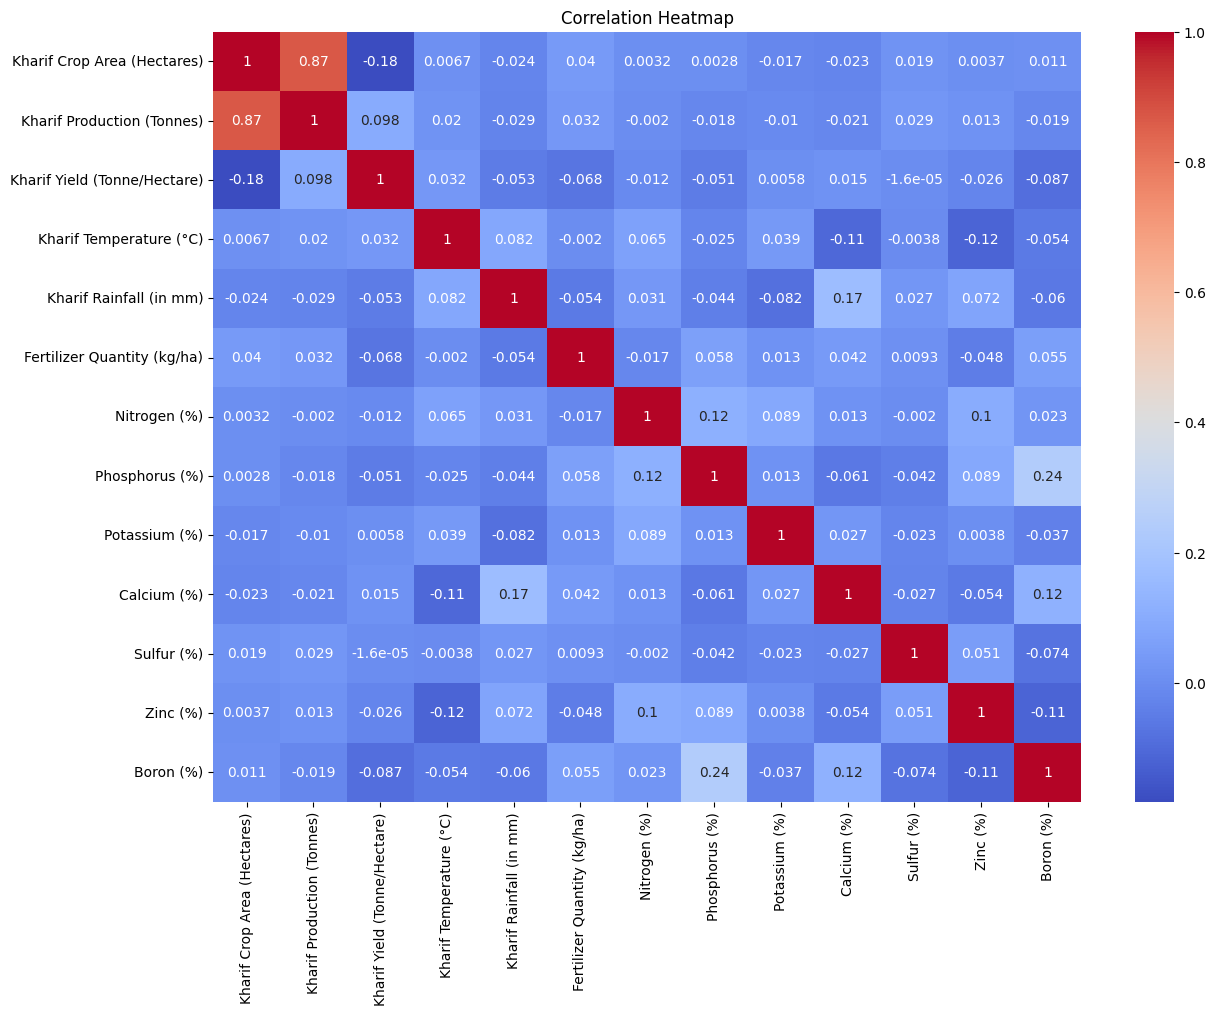

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # Import numpy

# Correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(data.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm') # Select only numeric columns
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Check the data types to identify non-numeric columns
print(data.dtypes)

# Identify non-numeric columns
non_numeric_columns = data.select_dtypes(exclude=['number']).columns

# Drop non-numeric columns
data = data.drop(columns=non_numeric_columns)

# Now calculate the correlation matrix
data.corr()

State                            object
District                         object
Year Range                       object
Kharif Crop Area (Hectares)     float64
Kharif Production (Tonnes)      float64
Kharif Yield (Tonne/Hectare)    float64
Kharif Temperature (°C)         float64
Kharif Rainfall (in mm)         float64
Fertilizer Quantity (kg/ha)     float64
Nitrogen (%)                    float64
Phosphorus (%)                  float64
Potassium (%)                   float64
Calcium (%)                     float64
Sulfur (%)                      float64
Zinc (%)                        float64
Boron (%)                       float64
dtype: object


,Kharif Crop Area (Hectares),Kharif Production (Tonnes),Kharif Yield (Tonne/Hectare),Kharif Temperature (°C),Kharif Rainfall (in mm),Fertilizer Quantity (kg/ha),Nitrogen (%),Phosphorus (%),Potassium (%),Calcium (%),Sulfur (%),Zinc (%),Boron (%)
Kharif Crop Area (Hectares),1.000000,0.870229,-0.182908,0.006703,-0.023593,0.040469,0.003162,0.002800,-0.016949,-0.022815,0.018913,0.003685,0.010795
Kharif Production (Tonnes),0.870229,1.000000,0.097712,0.019662,-0.029053,0.032147,-0.002002,-0.017977,-0.010068,-0.020875,0.029346,0.013095,-0.019188
Kharif Yield (Tonne/Hectare),-0.182908,0.097712,1.000000,0.032266,-0.053323,-0.067782,-0.011915,-0.051309,0.005758,0.015373,-0.000016,-0.025688,-0.087412
Kharif Temperature (°C),0.006703,0.019662,0.032266,1.000000,0.081738,-0.002007,0.065130,-0.025107,0.038621,-0.106042,-0.003755,-0.117362,-0.053909
Kharif Rainfall (in mm),-0.023593,-0.029053,-0.053323,0.081738,1.000000,-0.054028,0.030535,-0.043578,-0.081853,0.168003,0.027243,0.072161,-0.059887
Fertilizer Quantity (kg/ha),0.040469,0.032147,-0.067782,-0.002007,-0.054028,1.000000,-0.017254,0.057678,0.012963,0.041952,0.009308,-0.048341,0.054973
Nitrogen (%),0.003162,-0.002002,-0.011915,0.065130,0.030535,-0.017254,1.000000,0.115037,0.089311,0.013002,-0.002025,0.099873,0.023265
Phosphorus (%),0.002800,-0.017977,-0.051309,-0.025107,-0.043578,0.057678,0.115037,1.000000,0.012787,-0.061416,-0.042045,0.089184,0.238962
Potassium (%),-0.016949,-0.010068,0.005758,0.038621,-0.081853,0.012963,0.089311,0.012787,1.000000,0.027332,-0.023262,0.003823,-0.036873
Calcium (%),-0.022815,-0.020875,0.015373,-0.106042,0.168003,0.041952,0.013002,-0.061416,0.027332,1.000000,-0.027271,-0.053867,0.119838


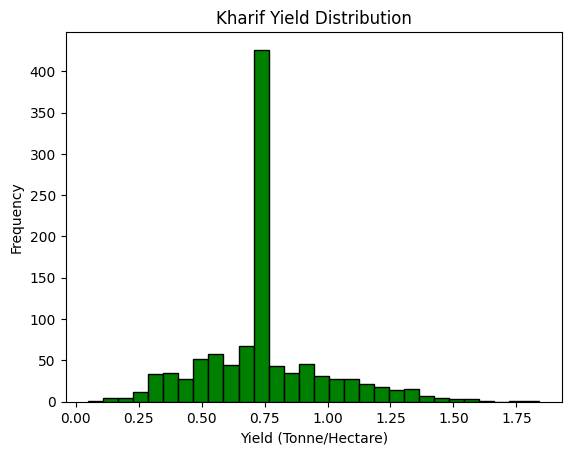

In [ ]:
# Histogram for Kharif Yield
plt.hist(data['Kharif Yield (Tonne/Hectare)'], bins=30, color='green', edgecolor='black')
plt.title('Kharif Yield Distribution')
plt.xlabel('Yield (Tonne/Hectare)')
plt.ylabel('Frequency')
plt.show()

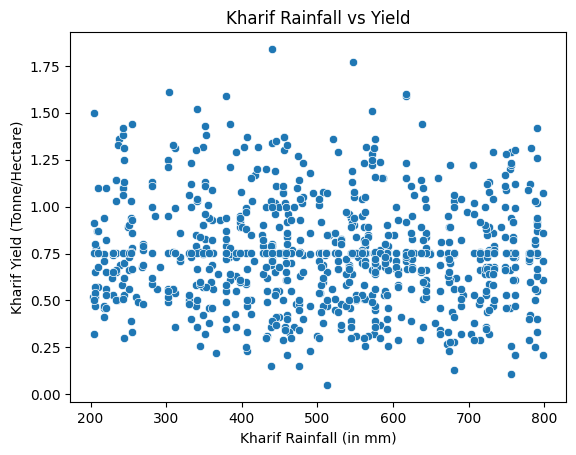

In [ ]:
sns.scatterplot(x=data['Kharif Rainfall (in mm)'], y=data['Kharif Yield (Tonne/Hectare)'])
plt.title('Kharif Rainfall vs Yield')
plt.xlabel('Kharif Rainfall (in mm)')
plt.ylabel('Kharif Yield (Tonne/Hectare)')
plt.show()

In [ ]:
# Define features (X) and target variable (y)
X = data.drop(columns=['Kharif Yield (Tonne/Hectare)'])  # Drop target column
y = data['Kharif Yield (Tonne/Hectare)']  # Target variable


# Display selected features
print(X.head())
print(y.head())

   Kharif Crop Area (Hectares)  Kharif Production (Tonnes)  \
0                  23349.07891                15595.253945   
1                  23543.00000                24490.000000   
2                  18643.00000                14273.000000   
3                  17892.00000                16596.000000   
4                  12305.00000                14116.000000   

   Kharif Temperature (°C)  Kharif Rainfall (in mm)  \
0                     21.0                   649.15   
1                     23.5                   641.79   
2                     33.8                   466.40   
3                     24.0                   371.61   
4                     31.0                   586.40   

   Fertilizer Quantity (kg/ha)  Nitrogen (%)  Phosphorus (%)  Potassium (%)  \
0                        84.35          6.38            2.50           3.04   
1                        50.37          5.43            2.96           4.74   
2                       168.99          9.10            3.8

In [ ]:
# Standardize features (Z-score normalization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train the Random Forest Model
rf_model = RandomForestRegressor(n_estimators=150, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, n_estimators=150, random_state=42)

In [ ]:
# Predict on test data
y_pred = rf_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# You already have a trained model named 'rf_model', so you can directly use it:
# Predict on the test data using the existing 'model'
y_pred = rf_model.predict(X_test)

# Flatten y_test and y_pred to 1D
# Note: Ensure you use 'y_test' instead of 'Y_test', as 'Y_test' is not defined
y_test = np.ravel(y_test)  # or y_test.flatten()
y_pred = np.ravel(y_pred)  # or y_pred.flatten()

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = (np.abs((y_test - y_pred) / y_test)).mean() * 100

# Calculate accuracy as (100 - MAPE)
accuracy = 100 - mape

print(f"Mean Squared Error (MSE): {mse:.5f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.5f}")
print(f"Mean Absolute Error (MAE): {mae:.5f}")
print(f"R² Score: {r2:.5f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Accuracy: {accuracy:.2f}%")

Mean Squared Error (MSE): 0.01987
Root Mean Squared Error (RMSE): 0.14095
Mean Absolute Error (MAE): 0.08663
R² Score: 0.67921
Mean Absolute Percentage Error (MAPE): 17.39%
Accuracy: 82.61%


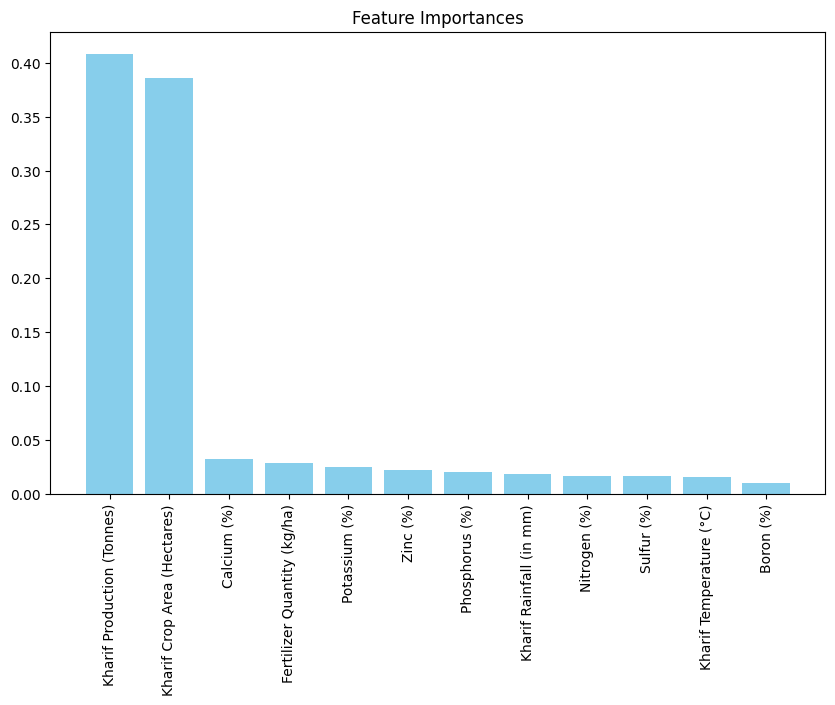

In [ ]:
import numpy as np

# Feature importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], color="skyblue", align="center")
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.show()

In [ ]:
# Create new data dynamically based on training features
new_data = pd.DataFrame([[10060, 150, 19, 140, 1.5, 0.8, 1.2,3.5,2.1,0.5,0.3,0.7]], columns=X.columns)

In [ ]:
# Ensure that new_data columns match exactly with the training feature names
print("Training Features:", list(X.columns))
print("New Data Features:", list(new_data.columns))

Training Features: ['Kharif Crop Area (Hectares)', 'Kharif Production (Tonnes)', 'Kharif Temperature (°C)', 'Kharif Rainfall (in mm)', 'Fertilizer Quantity (kg/ha)', 'Nitrogen (%)', 'Phosphorus (%)', 'Potassium (%)', 'Calcium (%)', 'Sulfur (%)', 'Zinc (%)', 'Boron (%)']
New Data Features: ['Kharif Crop Area (Hectares)', 'Kharif Production (Tonnes)', 'Kharif Temperature (°C)', 'Kharif Rainfall (in mm)', 'Fertilizer Quantity (kg/ha)', 'Nitrogen (%)', 'Phosphorus (%)', 'Potassium (%)', 'Calcium (%)', 'Sulfur (%)', 'Zinc (%)', 'Boron (%)']


In [ ]:
# Ensure that new_data columns match exactly with the training feature names
print("Training Features:", list(X.columns))
print("New Data Features:", list(new_data.columns))
# Scale the new data
new_data_scaled = scaler.transform(new_data)

# Predict yield using the trained Random Forest model
forecasted_yield = rf_model.predict(new_data_scaled)
print(f"Forecasted Yield: {forecasted_yield[0] * 100:.5f}% Tonne/Hectare")

Training Features: ['Kharif Crop Area (Hectares)', 'Kharif Production (Tonnes)', 'Kharif Temperature (°C)', 'Kharif Rainfall (in mm)', 'Fertilizer Quantity (kg/ha)', 'Nitrogen (%)', 'Phosphorus (%)', 'Potassium (%)', 'Calcium (%)', 'Sulfur (%)', 'Zinc (%)', 'Boron (%)']
New Data Features: ['Kharif Crop Area (Hectares)', 'Kharif Production (Tonnes)', 'Kharif Temperature (°C)', 'Kharif Rainfall (in mm)', 'Fertilizer Quantity (kg/ha)', 'Nitrogen (%)', 'Phosphorus (%)', 'Potassium (%)', 'Calcium (%)', 'Sulfur (%)', 'Zinc (%)', 'Boron (%)']
Forecasted Yield: 52.46010% Tonne/Hectare
